<a href="https://colab.research.google.com/github/joeyave/machine-learning-project4/blob/main/machine_learning_project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Машинне навчання
## Лабораторна робота №4. Авельцев Йосип

In [ ]:
import pandas as pd

data_file_path = '/content/drive/My Drive/Colab Notebooks/data-project4.csv'
data = pd.read_csv(data_file_path)
data["IntracranialPressure"] = 0
data

,IntracranialPressure,t36,t35,t34,t33,t32
0,0,37,35,33,28,26
1,0,38,33,30,28,25
2,0,33,34,30,31,29
3,0,45,30,27,28,19
4,0,36,31,29,27,25
5,0,44,40,37,33,28
6,0,35,33,28,27,25
7,0,34,29,28,26,24
8,0,39,34,31,29,24
9,0,38,36,33,29,25


### 1. Побудувати графік, на якому кожному пацієнту має відповідати окрема крива, що показує зміну показника в залежності від температури тіла. 

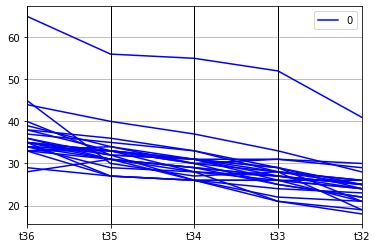

In [ ]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(data, "IntracranialPressure", color=['Blue'])

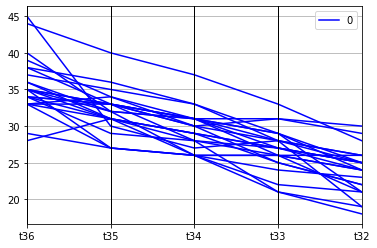

In [ ]:
data = data.drop(18)
parallel_coordinates(data, "IntracranialPressure", color=['Blue'])

### 2. Розбити пацієнтів на кластери за допомогою різних ієрархічних алгоритмів кластеризації. Результати роботи кожного з них подати у вигляді дендрограми. За виглядом дендрограм оцінити оптимальну кількість кластерів. Проаналізувати розбиття на оптимальну кількість кластерів різними алгоритмами та обрати найкраще з фізичної точки зору.

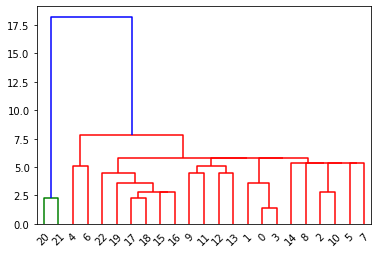

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

ac = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(data)
dn = hierarchy.dendrogram(hierarchy.linkage(ac.children_))

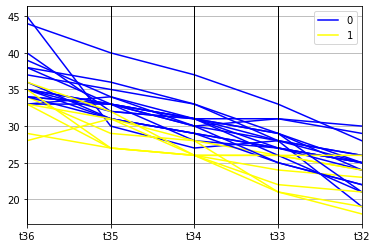

In [ ]:
tmp_data = data.copy()
tmp_data["IntracranialPressure"] = ac.labels_
parallel_coordinates(tmp_data, "IntracranialPressure", color=['Blue', 'Yellow'])

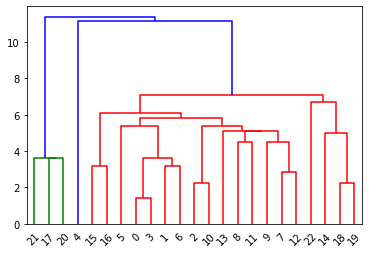

In [ ]:
ac = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(data)
dn = hierarchy.dendrogram(hierarchy.linkage(ac.children_))

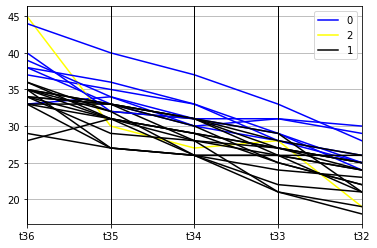

In [ ]:
tmp_data = data.copy()
tmp_data["IntracranialPressure"] = ac.labels_
parallel_coordinates(tmp_data, "IntracranialPressure", color=['Blue', 'Yellow', "Black"])

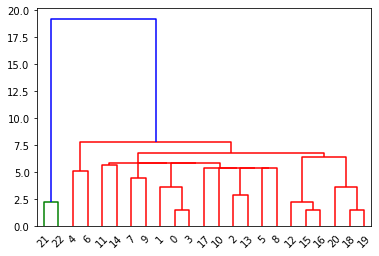

In [ ]:
ac = AgglomerativeClustering(n_clusters=2, linkage='average').fit(data)
dn = hierarchy.dendrogram(hierarchy.linkage(ac.children_))

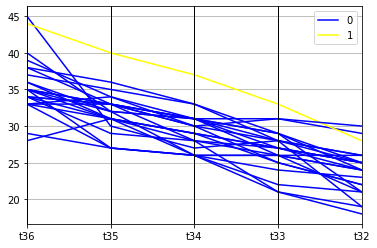

In [ ]:
tmp_data = data.copy()
tmp_data["IntracranialPressure"] = ac.labels_
parallel_coordinates(tmp_data, "IntracranialPressure", color=['Blue', 'Yellow'])

### 3. Розбити  пацієнтів  на  кластери  за  допомогою  алгоритму k-середніх.

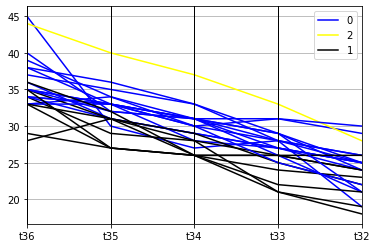

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score 
from sklearn.metrics import calinski_harabasz_score

km = KMeans(n_clusters=3).fit(data)

tmp_data = data.copy()
tmp_data["IntracranialPressure"] = km.labels_

parallel_coordinates(tmp_data, "IntracranialPressure", color=['Blue', 'Yellow', "Black"])

### 4. Оцінити оптимальну кількість кластерів для усіх використаних алгоритмів на основі індексу якості кластеризації (Calinski–Harabasz, Davies–Bouldin, Silhouette – одного з  них  або  одразу  декількох).

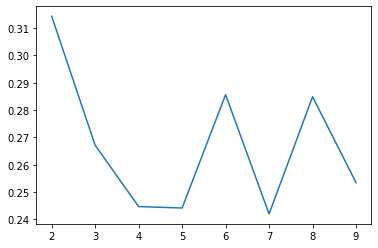

In [ ]:
import matplotlib.pyplot as plt

davies_bouldin_score_data = {}
silhouette_score_data = {}
calinski_harabasz_score_data = {}

for k in range(2, 10):
    km = KMeans(n_clusters=k).fit(data)
    davies_bouldin_score_data[k]=davies_bouldin_score(data, km.labels_)
    silhouette_score_data[k]=silhouette_score(data, km.labels_)
    calinski_harabasz_score_data[k]=calinski_harabasz_score(data, km.labels_)

plt.plot(list(silhouette_score_data.keys()), list(silhouette_score_data.values()), label='silhouette_score_data')

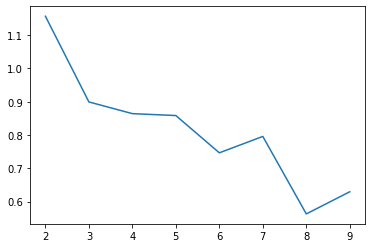

In [ ]:
plt.plot(list(davies_bouldin_score_data.keys()), list(davies_bouldin_score_data.values()), label='davies_bouldin_score_data')

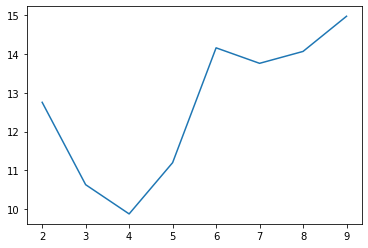

In [ ]:
plt.plot(list(calinski_harabasz_score_data.keys()), list(calinski_harabasz_score_data.values()), label='calinski_harabasz_score_data')

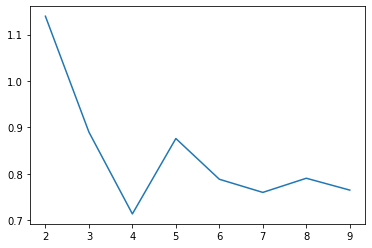

In [ ]:
davies_bouldin_score_data = {}
silhouette_score_data = {}
calinski_harabasz_score_data = {}

for k in range(2, 10):
    ac = AgglomerativeClustering(n_clusters=k, linkage='ward').fit(data)
    davies_bouldin_score_data[k]=davies_bouldin_score(data, ac.labels_)
    silhouette_score_data[k]=silhouette_score(data, ac.labels_)
    calinski_harabasz_score_data[k]=calinski_harabasz_score(data, ac.labels_)
        
plt.plot(list(davies_bouldin_score_data.keys()), list(davies_bouldin_score_data.values()), label='davies_bouldin_score_data')

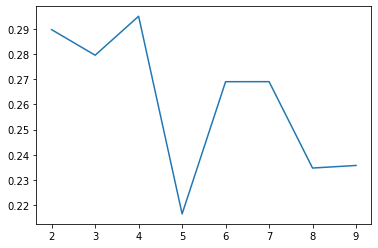

In [ ]:
plt.plot(list(silhouette_score_data.keys()), list(silhouette_score_data.values()), label='silhouette_score_data')

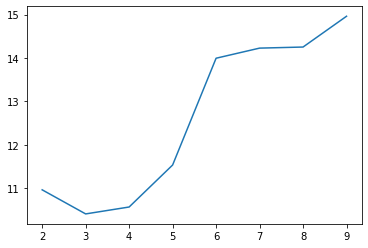

In [ ]:
plt.plot(list(calinski_harabasz_score_data.keys()), list(calinski_harabasz_score_data.values()), label='calinski_harabasz_score_data')

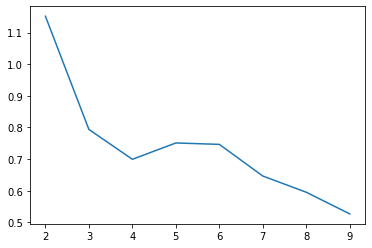

In [ ]:
davies_bouldin_score_data = {}
silhouette_score_data = {}
calinski_harabasz_score_data = {}

for k in range(2, 10):
    ac = AgglomerativeClustering(n_clusters=k, linkage='complete').fit(data)
    davies_bouldin_score_data[k]=davies_bouldin_score(data, ac.labels_)
    silhouette_score_data[k]=silhouette_score(data, ac.labels_)
    calinski_harabasz_score_data[k]=calinski_harabasz_score(data, ac.labels_)
        
plt.plot(list(davies_bouldin_score_data.keys()), list(davies_bouldin_score_data.values()), label='davies_bouldin_score_data')

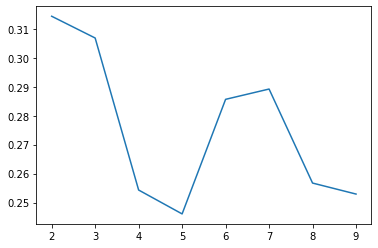

In [ ]:
plt.plot(list(silhouette_score_data.keys()), list(silhouette_score_data.values()), label='silhouette_score_data')

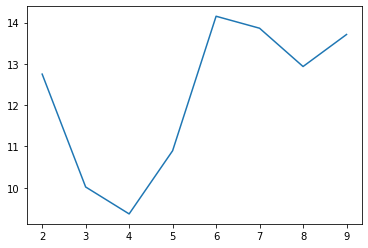

In [ ]:
plt.plot(list(calinski_harabasz_score_data.keys()), list(calinski_harabasz_score_data.values()), label='calinski_harabasz_score_data')

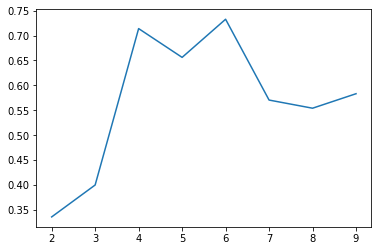

In [ ]:
davies_bouldin_score_data = {}
silhouette_score_data = {}
calinski_harabasz_score_data = {}

for k in range(2, 10):
    ac = AgglomerativeClustering(n_clusters=k, linkage='average').fit(data)
    davies_bouldin_score_data[k]=davies_bouldin_score(data, ac.labels_)
    silhouette_score_data[k]=silhouette_score(data, ac.labels_)
    calinski_harabasz_score_data[k]=calinski_harabasz_score(data, ac.labels_)
        
plt.plot(list(davies_bouldin_score_data.keys()), list(davies_bouldin_score_data.values()), label='davies_bouldin_score_data')

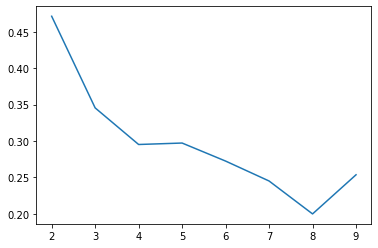

In [ ]:
plt.plot(list(silhouette_score_data.keys()), list(silhouette_score_data.values()), label='silhouette_score_data')

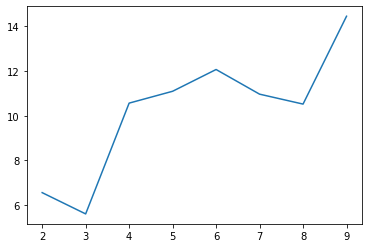

In [ ]:
plt.plot(list(calinski_harabasz_score_data.keys()), list(calinski_harabasz_score_data.values()), label='calinski_harabasz_score_data')

In [ ]:
from sklearn.metrics import adjusted_rand_score

ac1 = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(data)
ac2 = AgglomerativeClustering(n_clusters=2, linkage='complete').fit(data)
ac3 = AgglomerativeClustering(n_clusters=2, linkage='average').fit(data)
km = KMeans(n_clusters=2).fit(data)

print(adjusted_rand_score(ac1.labels_, km.labels_))
print(adjusted_rand_score(ac2.labels_, km.labels_))
print(adjusted_rand_score(ac3.labels_, km.labels_))
print(adjusted_rand_score(ac1.labels_, ac2.labels_))
print(adjusted_rand_score(ac1.labels_, ac3.labels_))
print(adjusted_rand_score(ac2.labels_, ac3.labels_))

0.06967925422657605
0.8330703692016409
0.055350553505535055
0.01188076800678896
-0.047748976807639676
0.0822622107969153
